In [1]:
from tfs.network import Network
net = Network()
net.load('lenet_epoch_1')

# construct deconv net to visualize
- works the same as : https://github.com/yosinski/deep-visualization-toolbox

In [2]:
from tfs.adapter import DeconvVisNet
visnet = DeconvVisNet(net)

Softmax doesn't define inverse op, ignore the layer
inv_fc [None, 10]->[None, 500]
inv_fc [None, 500]->[None, 4, 4, 50]
(?, 4, 4, 50)
inv_max_pool [None, 4, 4, 50]->[None, 8, 8, 50]
inv_conv [None, 8, 8, 50]->(1, 12, 12, 20)
(1, 12, 12, 20)
inv_max_pool [1, 12, 12, 20]->[None, 24, 24, 20]
inv_conv [None, 24, 24, 20]->(1, 28, 28, 1)


In [3]:
print net

Name:conv1     	Type:Conv2d(knum=20,ksize=[5, 5],strides=[1, 1],padding=VALID,activation=None)
Name:pool1     	Type:MaxPool(ksize=[2, 2],strides=[2, 2])
Name:conv2     	Type:Conv2d(knum=50,ksize=[5, 5],strides=[1, 1],padding=VALID,activation=relu)
Name:pool2     	Type:MaxPool(ksize=[2, 2],strides=[2, 2])
Name:ip1       	Type:FullyConnect(outdim=500,activation=relu)
Name:ip2       	Type:FullyConnect(outdim=10,activation=None)
Name:prob      	Type:Softmax()


In [4]:
net.print_shape()

conv1                       (?, 28, 28, 1) -> (?, 24, 24, 20)     
pool1                      (?, 24, 24, 20) -> (?, 12, 12, 20)     
conv2                      (?, 12, 12, 20) -> (?, 8, 8, 50)       
pool2                        (?, 8, 8, 50) -> (?, 4, 4, 50)       
ip1                          (?, 4, 4, 50) -> (?, 500)            
ip2                               (?, 500) -> (?, 10)             
prob                               (?, 10) -> (?, 10)             


In [5]:
from tfs.dataset import Mnist
dataset = Mnist()

In [6]:
datablob = dataset.train.data[0,:,:,0]

Populating the interactive namespace from numpy and matplotlib


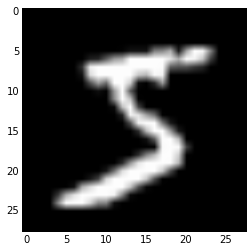

In [7]:
%pylab inline
imshow(datablob,cmap='gray')

# visualize neurons 
- visualize the neurons in feed-forward pass

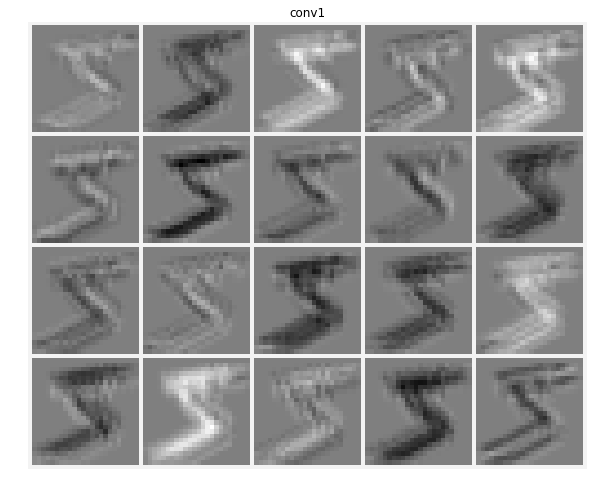

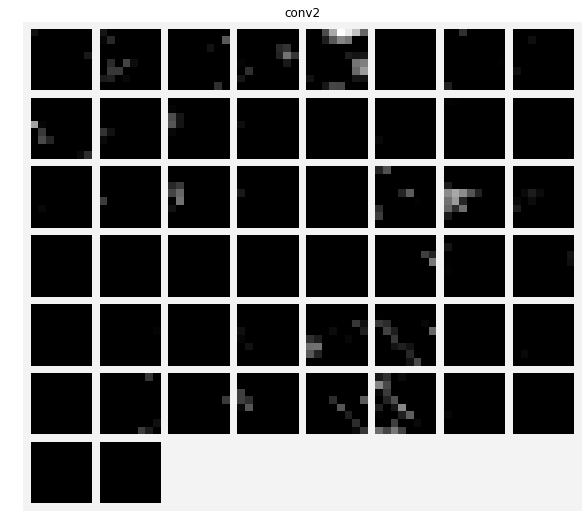

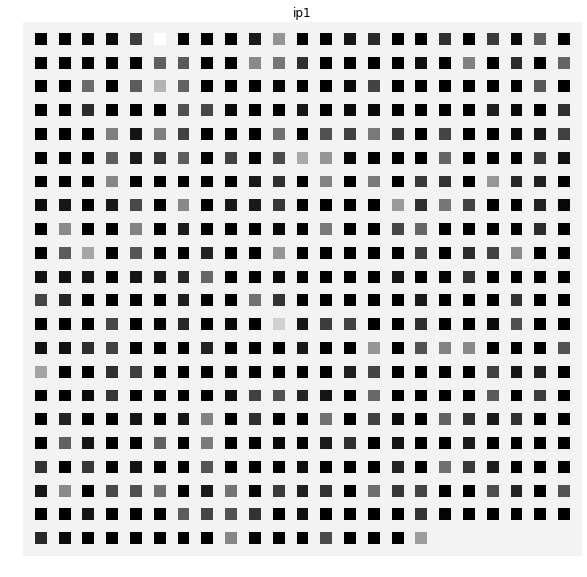

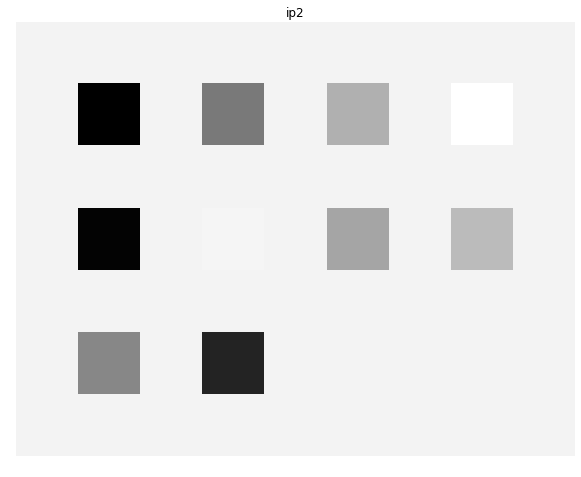

In [8]:
ls = ['conv1','conv2','ip1','ip2']
for l in ls:
    figure(figsize=(10,10))
    img = visnet.img_layer(l,datablob.reshape(1,28,28,1)) # reshape to fill into the network
    imshow(img,cmap='gray',interpolation='nearest')
    axis('off')
    title('%s'%l)

# visualize weights

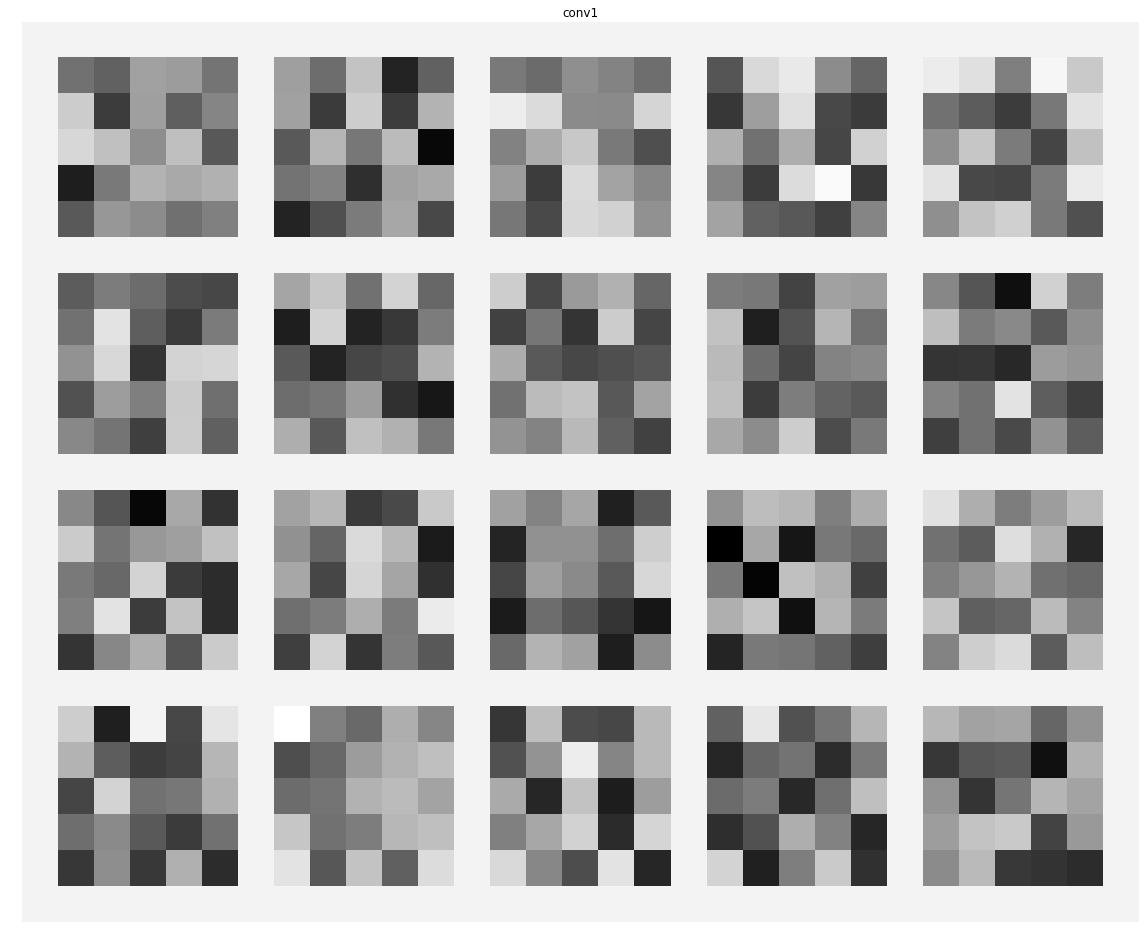

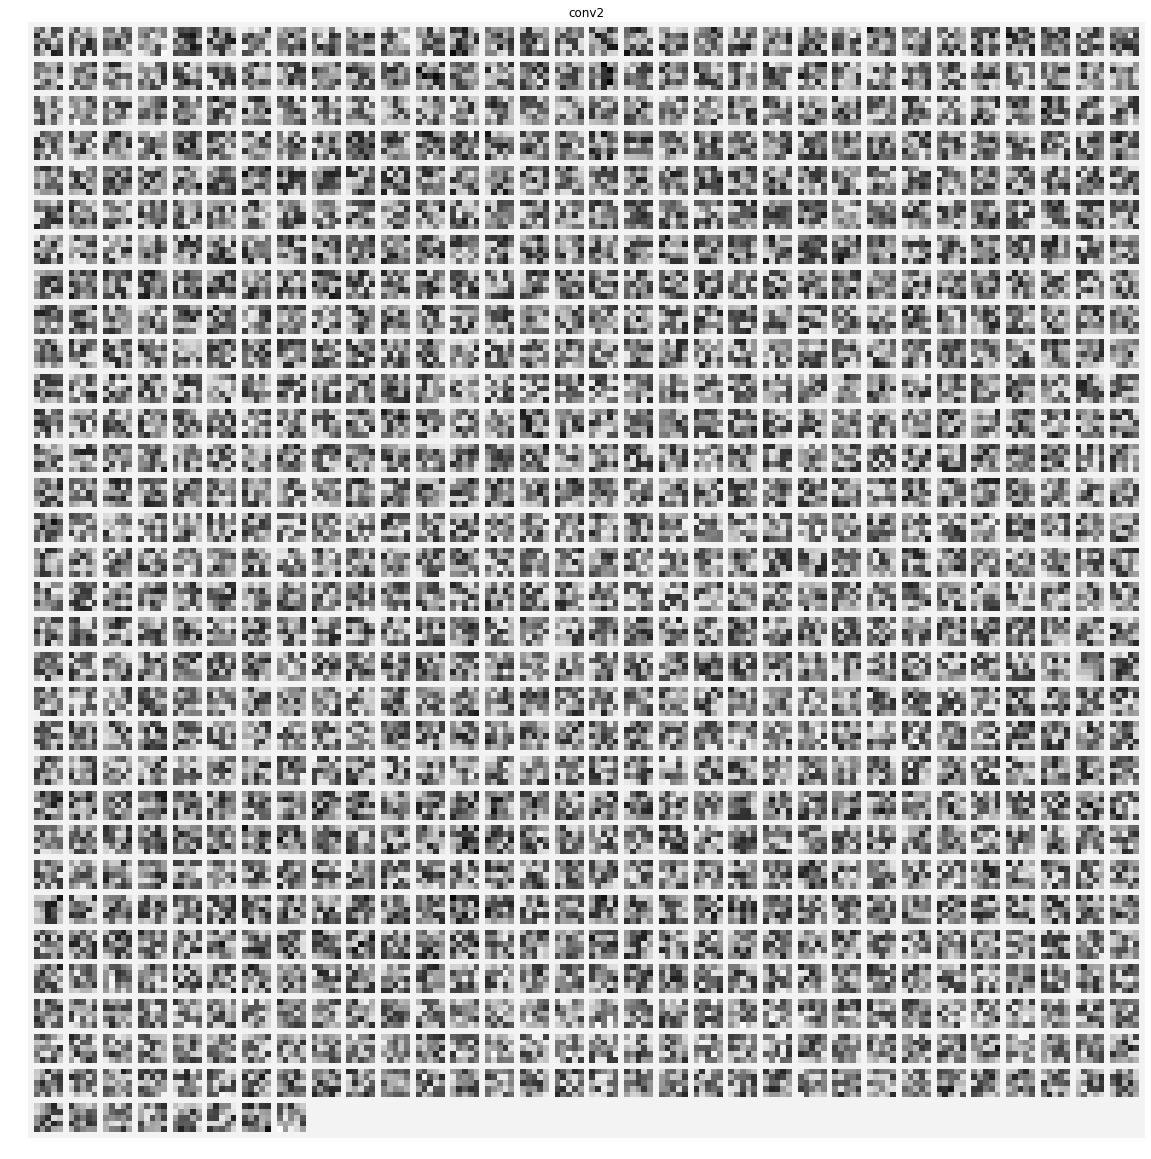

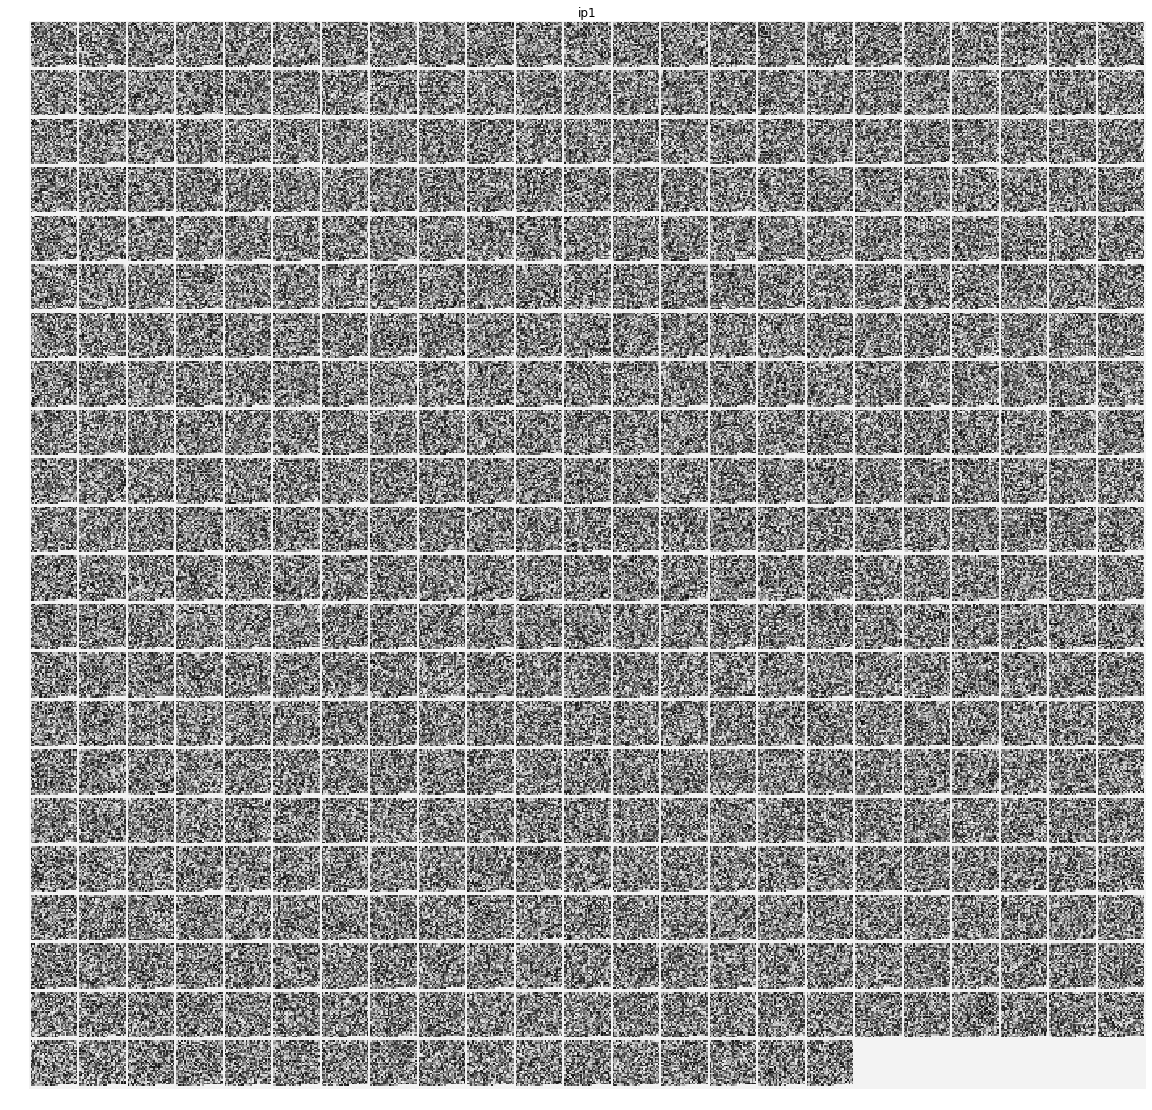

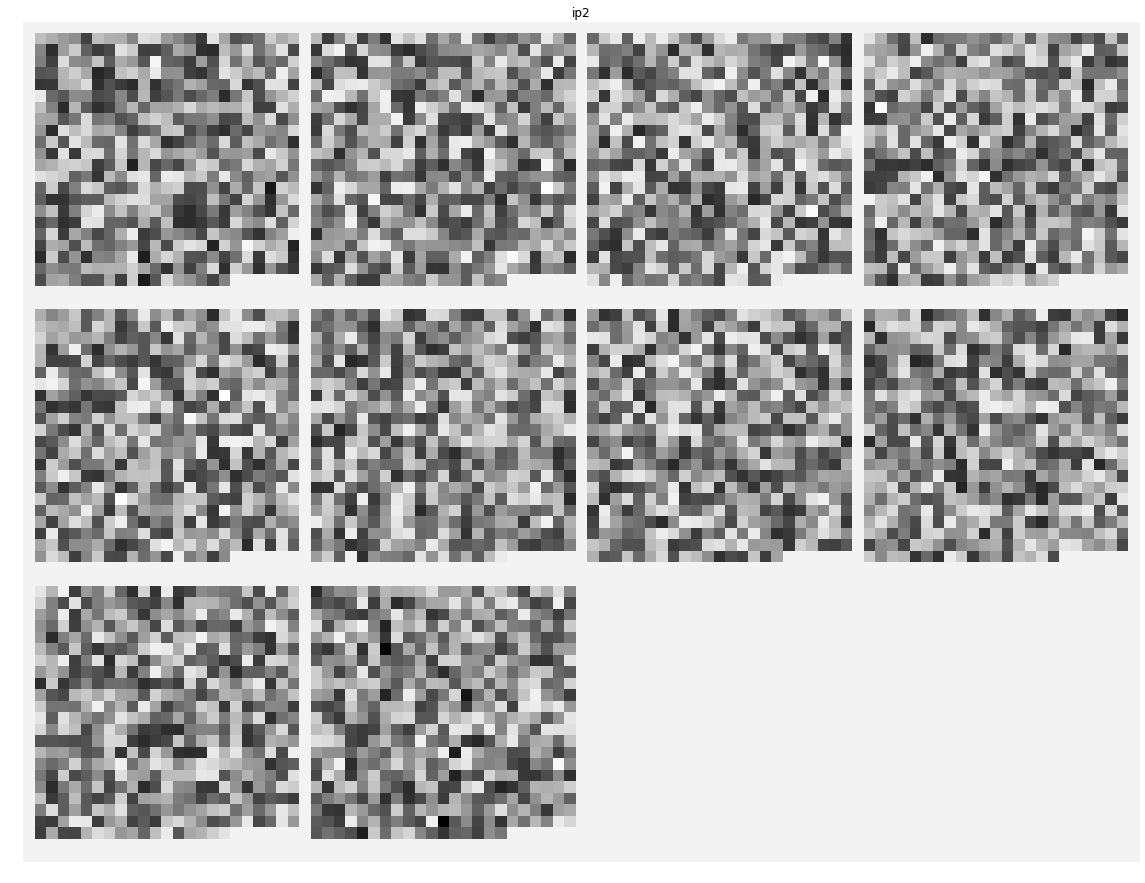

In [9]:
ls = ['conv1','conv2','ip1','ip2']
for l in ls:
    figure(figsize=(20,20))
    img = visnet.img_weight(l,datablob.reshape(1,28,28,1))
    imshow(img,cmap='gray',interpolation='nearest')
    axis('off')
    title('%s'%l)

# deconv visualization

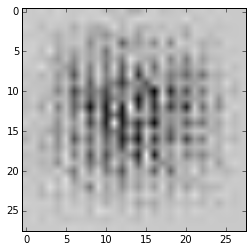

In [10]:
img = visnet.img_deconv_channel('conv1',0,datablob.reshape(1,28,28,1))
imshow(img,cmap='gray')